In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import approx_fprime

In [2]:
def gradient_descent(f, x0, alpha, max_iter=100, tol=1e-6, eps=1e-5):
    """Gradient descent implementation using numerical approximation of the gradient.

    Parameters:
        f: Objective function to minimize
        x0: Initial guess (as a NumPy array)
        alpha: Learning rate
        max_iter: Maximum number of iterations
        tol: Tolerance for the stopping criterion
        eps: Step size for finite differences in gradient approximation

    Returns:
        x: The estimated minimizer.
        x_history: List of iterates (history of x values).
    """
    x = x0
    x_history = [x]
    
    for t in range(max_iter):
        grad = approx_fprime(x, f, eps)       
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        x_history.append(x)
        
    return x, x_history

In [3]:
def f(point):
   x, y = point
   return (x - 2)**2 + 2 * (y - 5)**2

p0 = [0, 0]  # Initial guess
alpha = 0.1  # Learning rate

minimum, x_history = gradient_descent(f, p0, alpha)
print('Minimum:', minimum)
print('Number of iterations:', len(x_history))

Minimum: [1.99999021 4.999995  ]
Number of iterations: 59


Plot the learning curve

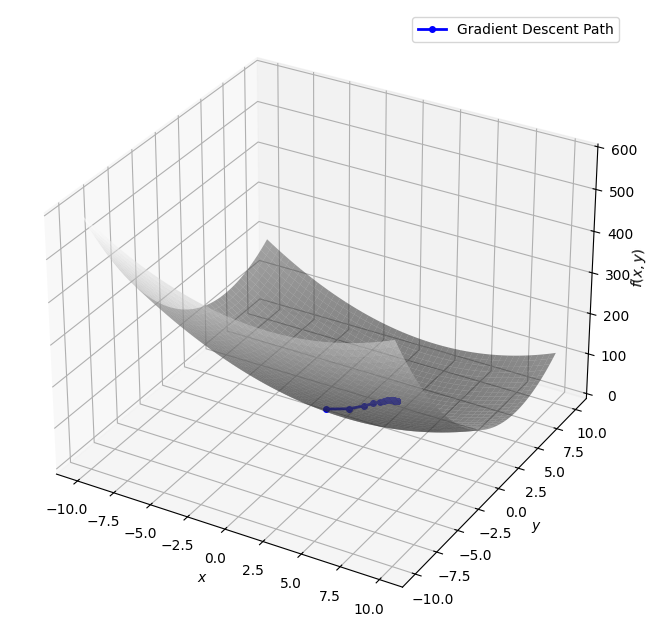

In [4]:
# Create a meshgrid for x and y values
x_values = np.linspace(-10, 10, 500)
y_values = np.linspace(-10, 10, 500)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Evaluate f over the meshgrid using broadcasting
z_mesh = f([x_mesh, y_mesh])

# Extract the path taken by gradient descent
x_path, y_path = np.array(x_history).T
z_path = f([x_path, y_path])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='gray', alpha=0.5)

# Overlay the gradient descent path
ax.plot(x_path, y_path, z_path, color='b', marker='o', markersize=4, 
        linestyle='-', linewidth=2, label='Gradient Descent Path')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$', labelpad=-0.3)
ax.legend()

plt.savefig('figures/gradient_descent_path.pdf', bbox_inches='tight')